In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df= pd.read_csv('Customer Churn.csv')
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#replacing black with 0 as tenue is 0 and no total charges are recorded

In [27]:
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df.isnull().sum().sum()

np.int64(0)

In [32]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [36]:
df["customerID"].duplicated().sum()

np.int64(0)

#convert 0 and 1 of values Senior Citizens into yes and no to make it easier 

In [39]:
def conv(value) :
    if value == 1 :
        return "Yes"
    else :
        return "No"


df['SeniorCitizen']= df['SeniorCitizen'].apply(conv)

In [40]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


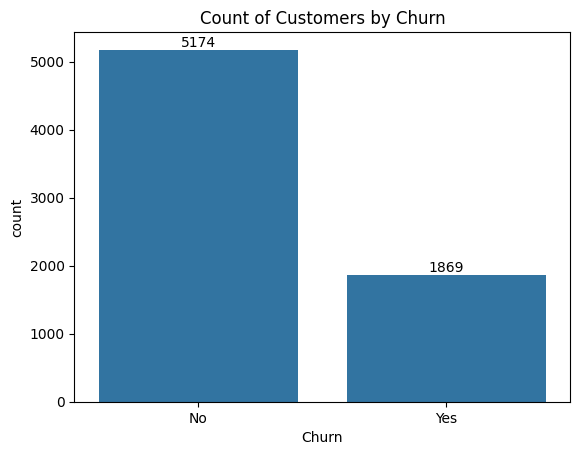

In [60]:
ax=sns.countplot(x='Churn', data= df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

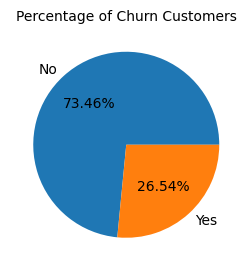

In [58]:
plt.figure(figsize = (3,4))
gb= df.groupby("Churn").agg({'Churn': 'count'})
plt.pie(gb['Churn'],labels= gb.index, autopct='%1.2f%%')
plt.title("Percentage of Churn Customers",fontsize=10)
plt.show()

#from the given pie chart we find out 26.54% of our customer has churn out and now let's explore the reason behind this

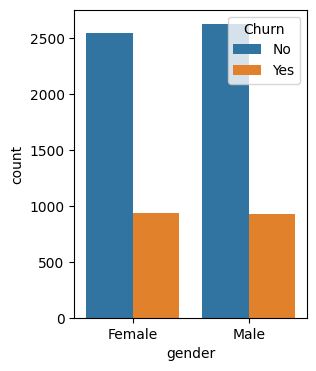

In [72]:
plt.figure(figsize=(3,4))
sns.countplot(x='gender',data = df,hue='Churn')
plt.title('Churn by gender')
plt.show()

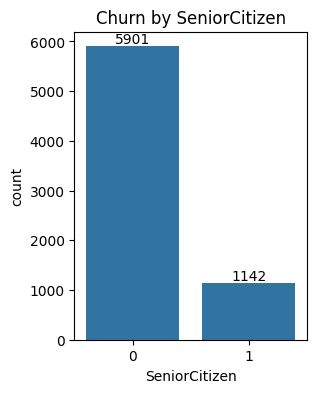

In [78]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x='SeniorCitizen',data = df)
ax.bar_label(ax.containers[0])
plt.title('Churn by SeniorCitizen')
plt.show()

<Figure size 400x300 with 0 Axes>

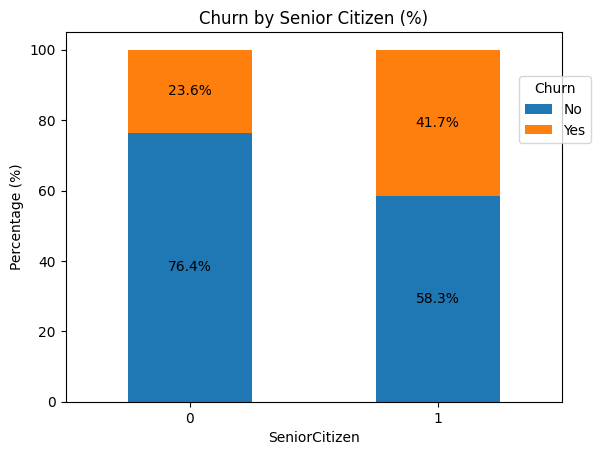

In [82]:
senior_churn_counts = df.groupby(['SeniorCitizen', 'Churn']).size().reset_index(name='count')

# Step 2: Pivot the data to get the counts for each 'Churn' category in separate columns
senior_churn_pivot = senior_churn_counts.pivot_table(index='SeniorCitizen', columns='Churn', values='count', fill_value=0)

# Step 3: Normalize the counts to get percentages for each SeniorCitizen group
senior_churn_percent = senior_churn_pivot.div(senior_churn_pivot.sum(axis=1), axis=0) * 100

# Step 4: Plot the stacked bar chart
plt.figure(figsize=(4, 3))
ax = senior_churn_percent.plot(kind='bar', stacked=True)

# Step 5: Annotate the bars with the percentages
for p in ax.patches:
    height = p.get_height()
    width = p.get_width()
    x = p.get_x() + width / 2
    y = p.get_y() + height / 2
    ax.annotate(f'{height:.1f}%', (x, y), ha='center', va='center', fontsize=10)

# Step 6: Add title and labels
plt.title('Churn by Senior Citizen (%)', fontsize=12)
plt.ylabel("Percentage (%)")
plt.xticks(rotation=0)
plt.legend(title="Churn", bbox_to_anchor=(0.9, 0.9))

# Show the plot
plt.show()

#comparative a greater % of people churned out is Senior Citizen

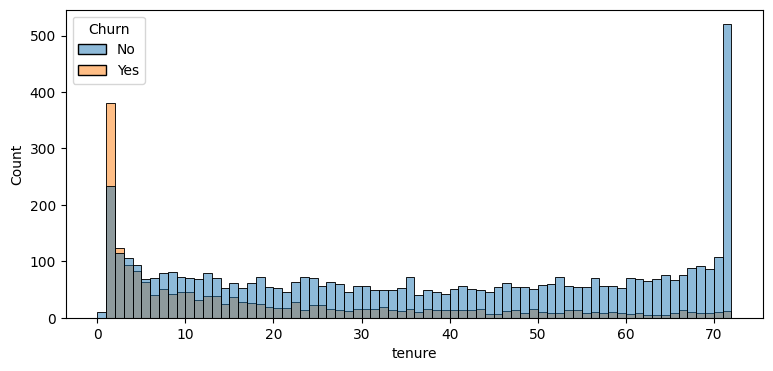

In [89]:
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data = df,bins= 72,hue='Churn')
plt.show()

#People who have used our service longer has stayed and people who have used our services for 1,2 month have churned  

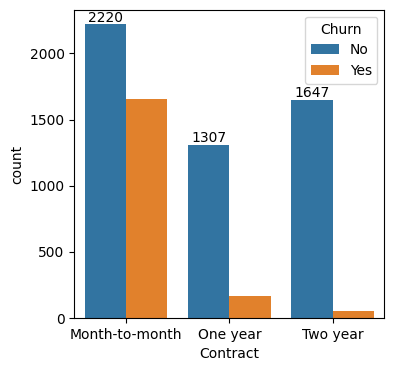

In [93]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='Contract' ,data=df,hue='Churn')
ax.bar_label(ax.containers[0])
plt.show()

In [ ]:
# People who have month to month contract have likely to churn as of 1 or 2 years of contract 

In [94]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

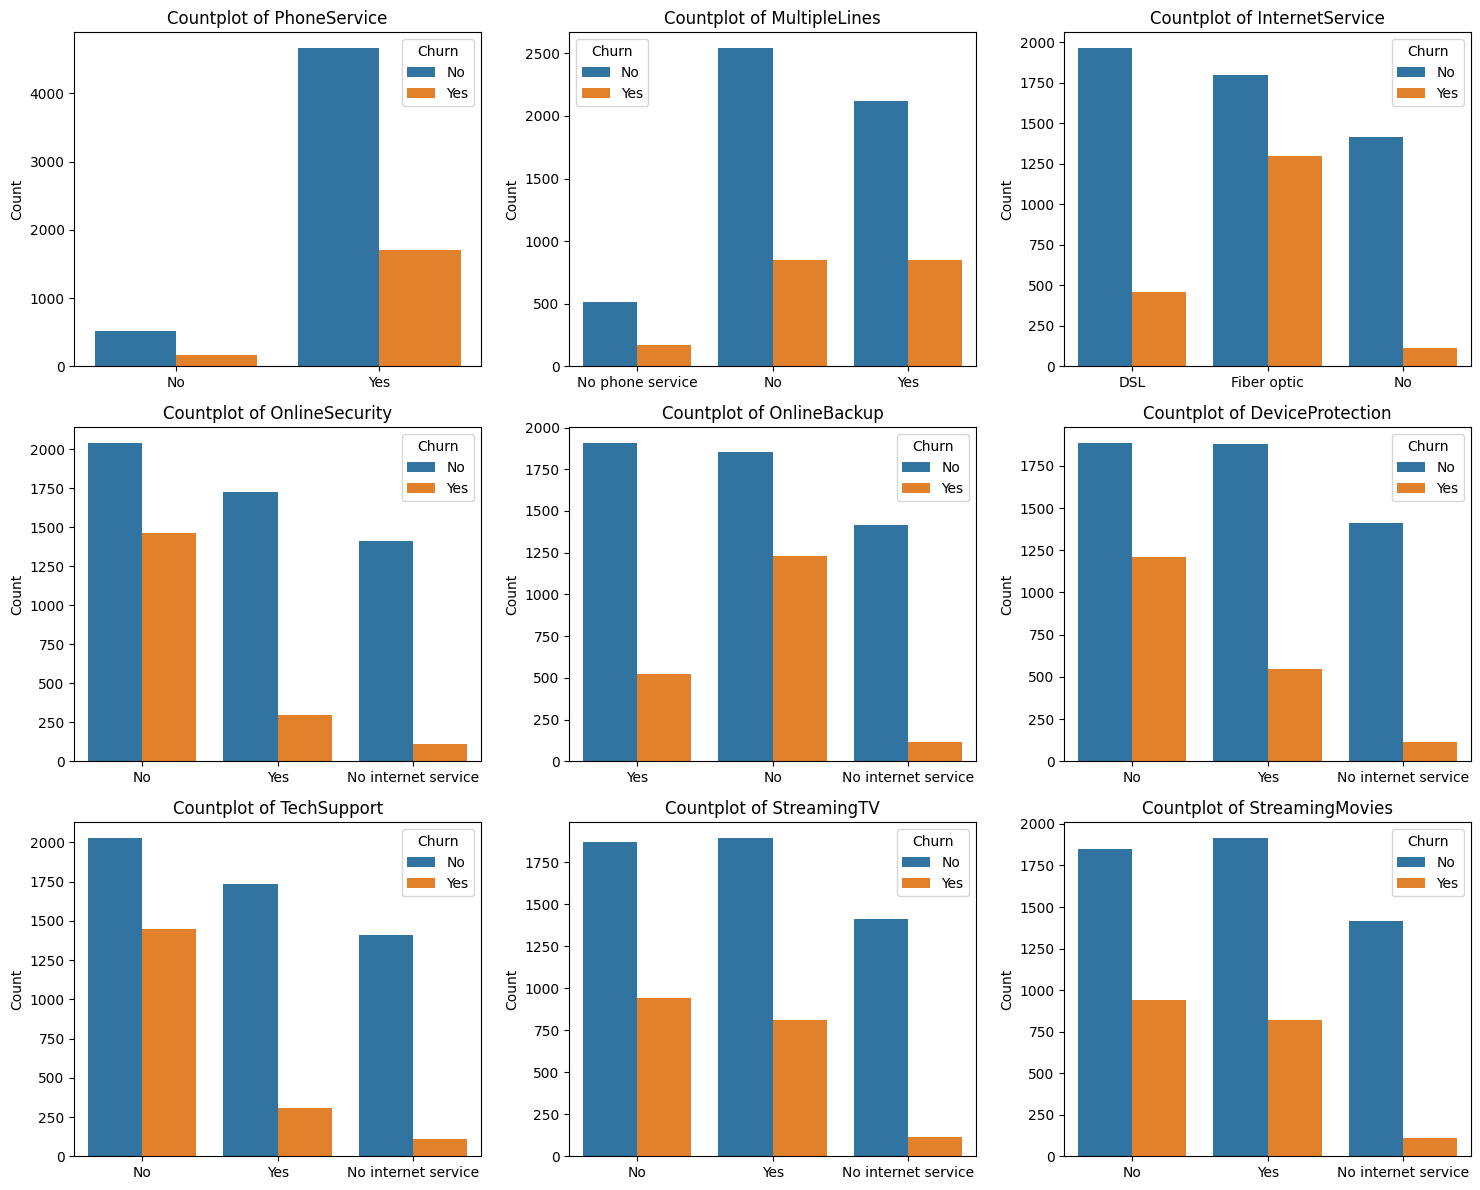

In [96]:
columns = ['PhoneService', 'MultipleLines', 'InternetService',
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
           'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure and axes for subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))
axes = axes.flatten()  # Flatten to easily index axes

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(data=df, x=col, ax=axes[i],hue=df['Churn'])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

# Adjust layout to avoid overlap
plt.tight_layout()
plt.show()

 '''Customers with no additional services, such as "Online Security," "Device Protection," or "Tech Support," tend to churn more.
 Fiber optic internet users exhibit higher churn compared to DSL users. Features like "StreamingTV" and "StreamingMovies" show churn 
 rates influenced by service subscriptions. This analysis highlights how specific services impact customer retention.'''

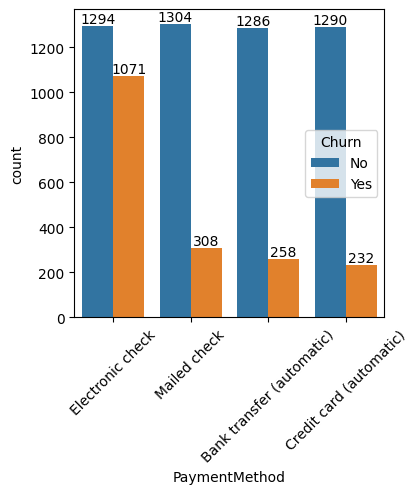

In [99]:
plt.figure(figsize= (4,4))
ax=sns.countplot(x='PaymentMethod' ,data=df,hue='Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.xticks(rotation =45)
plt.show()

#customer which are using Electronic check as Payment Method likely to be churn